In [1]:
#Principles of Machine Learning Final Exam
#Classification Model
#Use the Adventure Works Cycles customer data you worked with in challenge 1 to create a classification model that 
#predicts whether or not a customer will purchase a bike. 
#The model should predict bike purchasing for new customers for whom no information 
#about average monthly spend or previous bike purchases is available.

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
import numpy as np
import numpy.random as nr
import math
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm


In [3]:
#Load Dataset
customers = pd.read_csv('AdvWorksCusts.csv')
customers.head()
customers_spend= pd.read_csv('AW_AveMonthSpend.csv')
customers_buy= pd.read_csv('AW_BikeBuyer.csv')

In [4]:
#Remove duplicates
print(customers.shape)
print(customers.CustomerID.unique().shape)

(16519, 23)
(16404,)


In [5]:
customers.drop_duplicates(subset='CustomerID', keep='last', inplace=True)
print(customers.shape)
print(customers.CustomerID.unique().shape)

(16404, 23)
(16404,)


In [6]:
print(customers_spend.shape)
print(customers_spend.CustomerID.unique().shape)

(16519, 2)
(16404,)


In [7]:
customers_spend.drop_duplicates(subset='CustomerID', keep='last',inplace=True)
print(customers_spend.shape)
print(customers_spend.CustomerID.unique().shape)

(16404, 2)
(16404,)


In [8]:
print(customers_buy.shape)
print(customers.CustomerID.unique().shape)

(16519, 2)
(16404,)


In [9]:
customers_buy.drop_duplicates(subset='CustomerID',keep='last',inplace=True)
print(customers_buy.shape)
print(customers.CustomerID.unique().shape)

(16404, 2)
(16404,)


In [10]:
#Check for missing values
(customers_spend.astype(np.object).isnull()).any()

CustomerID       False
AveMonthSpend    False
dtype: bool

In [11]:
customers_buy.astype(np.object).isnull().any()

CustomerID    False
BikeBuyer     False
dtype: bool

In [12]:
customers.astype(np.object).isnull().any()

CustomerID              False
Title                    True
FirstName               False
MiddleName               True
LastName                False
Suffix                   True
AddressLine1            False
AddressLine2             True
City                    False
StateProvinceName       False
CountryRegionName       False
PostalCode              False
PhoneNumber             False
BirthDate               False
Education               False
Occupation              False
Gender                  False
MaritalStatus           False
HomeOwnerFlag           False
NumberCarsOwned         False
NumberChildrenAtHome    False
TotalChildren           False
YearlyIncome            False
dtype: bool

In [13]:
customers.describe()

,CustomerID,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
count,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000
mean,20240.143136,0.674104,1.499756,0.991100,2.004511,78129.672397
std,5340.370705,0.468723,1.139135,1.514278,1.682318,39728.383493
min,11000.000000,0.000000,0.000000,0.000000,0.000000,9482.000000
25%,15617.750000,0.000000,1.000000,0.000000,0.000000,47808.750000
50%,20231.500000,1.000000,2.000000,0.000000,2.000000,76125.000000
75%,24862.250000,1.000000,2.000000,2.000000,3.000000,105211.750000
max,29482.000000,1.000000,4.000000,5.000000,5.000000,196511.000000


In [14]:
customers_spend.describe()

,CustomerID,AveMonthSpend
count,16404.000000,16404.000000
mean,20240.143136,72.391002
std,5340.370705,27.269921
min,11000.000000,22.000000
25%,15617.750000,52.000000
50%,20231.500000,68.000000
75%,24862.250000,84.000000
max,29482.000000,176.000000


In [15]:
customers_buy.describe()

,CustomerID,BikeBuyer
count,16404.000000,16404.000000
mean,20240.143136,0.332541
std,5340.370705,0.471138
min,11000.000000,0.000000
25%,15617.750000,0.000000
50%,20231.500000,0.000000
75%,24862.250000,1.000000
max,29482.000000,1.000000


In [16]:
customers_buy.BikeBuyer.value_counts(normalize=True)

0    0.667459
1    0.332541
Name: BikeBuyer, dtype: float64

In [17]:
customers_combined=customers.merge(customers_buy,on='CustomerID',how='left')
customers_combined.head()

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,BikeBuyer
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,...,Bachelors,Professional,M,M,1,0,0,2,137947,0
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,...,Bachelors,Professional,M,S,0,1,3,3,101141,1
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,...,Bachelors,Professional,M,M,1,1,3,3,91945,0
3,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,...,Bachelors,Professional,F,S,0,1,0,0,86688,0
4,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,...,Bachelors,Professional,F,S,1,4,5,5,92771,1


In [18]:
# plot box plot for numeric features' visualisations
def plot_box(customers_combined, cols, col_x = 'BikeBuyer'):
    for col in cols:
        sns.set(style="darkgrid")
        sns.boxplot(col_x, col, data=customers_combined)
        plt.xlabel(col_x) 
        plt.ylabel(col)
        plt.show()

cols = ['YearlyIncome','NumberCarsOwned', 'NumberChildrenAtHome','TotalChildren']

In [19]:
customer_has_bike= customers_combined.BikeBuyer==1
bike_buyers = customers_combined[customer_has_bike]
print(bike_buyers.shape)
customer_has_no_bike= customers_combined.BikeBuyer==0
non_bike_buyers = customers_combined[customer_has_no_bike]
print(non_bike_buyers.shape)

(5455, 24)
(10949, 24)


In [20]:
#Plot bar charts for BikeBuyer count
def plt_bar_plot(cat_cols):
    customers_combined['dummy'] = np.ones(shape = customers_combined.shape[0])
    for col in cat_cols:
        print(col)
        counts = customers_combined[['dummy', 'BikeBuyer', col]].groupby(['BikeBuyer', col], as_index = False).count()
        temp = counts[counts['BikeBuyer'] == 0][[col, 'dummy']]
        temp = counts[counts['BikeBuyer'] == 0][[col, 'dummy']]
        temp.plot.bar(x=col,y ='dummy')

        plt.title('Counts for ' + col + '\n non bike buyer')
        plt.ylabel('count')
        temp = counts[counts['BikeBuyer'] == 1][[col, 'dummy']]
        temp.plot.bar(x=col,y ='dummy')

        plt.title('Counts for ' + col + '\n bike buyer')
        plt.ylabel('count')
        plt.show()

Occupation


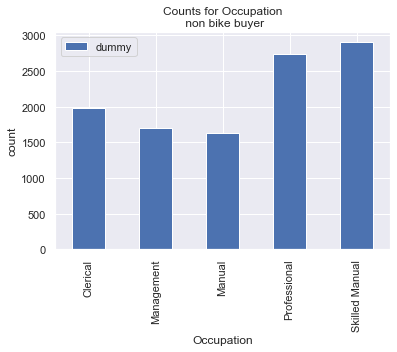

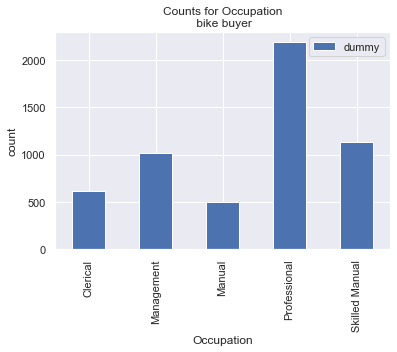

Gender


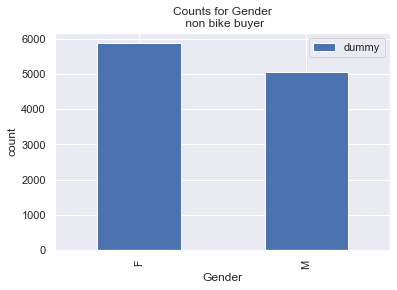

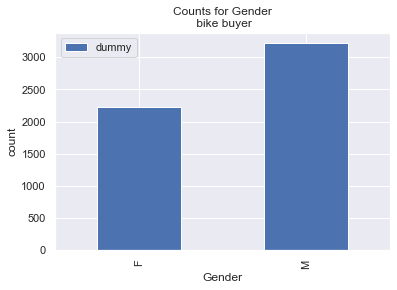

MaritalStatus


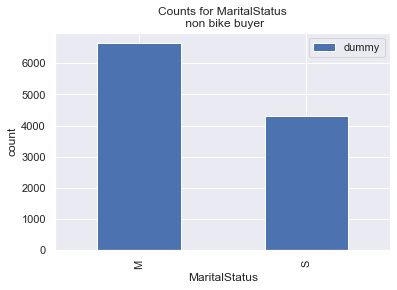

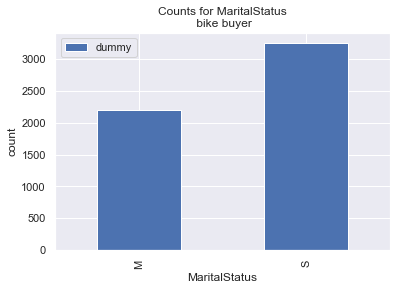

In [21]:
cols = ['Occupation', 'Gender','MaritalStatus']
plt_bar_plot(cols)

In [22]:
# try feature generation - hasChildren
has_child_at_home = []
def generate_has_child_at_home(customers, has_child_at_home):
    for index, row in customers.iterrows():
        if row.NumberChildrenAtHome>0:
            has_child_at_home.append('Y')
        else:
            has_child_at_home.append('N')
    return has_child_at_home
        
customers_combined['hasChildAtHome'] = generate_has_child_at_home(customers, has_child_at_home)
customers_combined[['hasChildAtHome','NumberChildrenAtHome']].head()

,hasChildAtHome,NumberChildrenAtHome
0,N,0
1,Y,3
2,Y,3
3,N,0
4,Y,5


hasChildAtHome


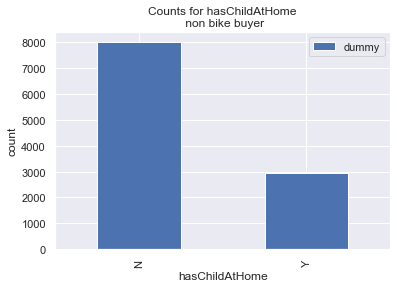

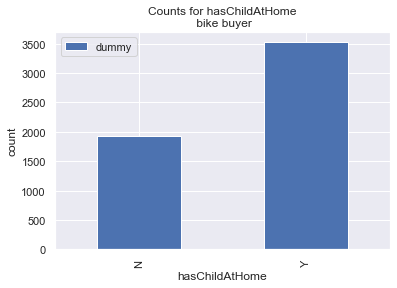

In [23]:
cols = ['hasChildAtHome']
plt_bar_plot(cols)

In [24]:
chosen_features = ['YearlyIncome','NumberCarsOwned', 'Occupation', 'Gender','MaritalStatus','hasChildAtHome']
complete_features = customers_combined[chosen_features]
complete_features.head()

,YearlyIncome,NumberCarsOwned,Occupation,Gender,MaritalStatus,hasChildAtHome
0,137947,0,Professional,M,M,N
1,101141,1,Professional,M,S,Y
2,91945,1,Professional,M,M,Y
3,86688,1,Professional,F,S,N
4,92771,4,Professional,F,S,Y


In [25]:
labels = np.array(customers_combined.BikeBuyer)
print(labels)

[0 1 0 ... 0 0 0]


In [26]:
#Scikit Learn Model classification
def encode_string(cat_features):
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_features)
    enc_cat_features = enc.transform(cat_features)
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_cat_features.reshape(-1,1))
    return encoded.transform(enc_cat_features.reshape(-1,1)).toarray() 

In [27]:
def encode_cat_features(complete_features):
    cat_features = [ 'Gender','MaritalStatus','hasChildAtHome']
    f = encode_string(complete_features['Occupation'])
    for cat in cat_features:
        enc = encode_string(complete_features[cat])
        f = np.concatenate([f,enc],1)
    return f

In [28]:
numeric_features = np.array(customers_combined[['YearlyIncome','NumberCarsOwned']])

In [29]:
encoded_features = encode_cat_features(complete_features)

C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can speci

In [30]:
features = np.concatenate([encoded_features,numeric_features], 1)

In [31]:
features.shape
features[3,:13]

array([0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00,
       0.0000e+00, 8.6688e+04, 1.0000e+00])

In [32]:
#To split and train th model compute the following:
nr.seed(9988)
indx = range(features.shape[0])
indx = ms.train_test_split(indx, test_size = 300)
X_train = features[indx[0],:]
y_train = np.ravel(labels[indx[0]])
X_test = features[indx[1],:]
y_test = np.ravel(labels[indx[1]])
X_train[:2]

array([[1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00,
        0.00000e+00, 3.97160e+04, 1.00000e+00],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00,
        0.00000e+00, 1.72468e+05, 2.00000e+00]])

In [33]:
# Let's scale the model
scaler = preprocessing.StandardScaler().fit(X_train[:,11:])
X_train[:,11:] = scaler.transform(X_train[:,11:])
X_test[:,11:] = scaler.transform(X_test[:,11:])
X_train[:2]


array([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  1.        ,
         0.        , -0.96803832, -0.43876786],
       [ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  1.        ,  1.        ,
         0.        ,  2.37320265,  0.43844103]])

In [34]:
#The class is imbalanced, we'll use class weight parameters
logistic_mod = linear_model.LogisticRegression(class_weight="balanced")

In [35]:
#perform cross validation for the regularisation parameter

nr.seed(201)
inside = ms.KFold(n_splits=10, shuffle = True)
nr.seed(432)
outside = ms.KFold(n_splits=10, shuffle = True)
nr.seed(5764)
param_grid = {"C": [0.1, 1, 10, 100, 1000]}
clf = ms.GridSearchCV(estimator = logistic_mod, param_grid = param_grid, 
                      cv = inside, # Use the inside folds
                      scoring = 'roc_auc',
                      return_train_score = True)
clf.fit(features, labels)
clf.best_estimator_.C

C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: 

C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: 

0.1

In [36]:
nr.seed(657)
cv_estimate = ms.cross_val_score(clf, features, labels, 
                                 cv = outside) # Use the outside folds
print('Mean performance metric = %4.3f' % np.mean(cv_estimate))

print('SDT of the metric       = %4.3f' % np.std(cv_estimate))
print('Outcomes by cv fold')
for i, x in enumerate(cv_estimate):
    print('Fold %2d    %4.3f' % (i+1, x))

C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: 

C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: 

C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: 

C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: 

C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: 

C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: 

C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: 

C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: 

C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: 

C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: 

C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: 

C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: 

C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: 

Mean performance metric = 0.670
SDT of the metric       = 0.011
Outcomes by cv fold
Fold  1    0.661
Fold  2    0.682
Fold  3    0.651
Fold  4    0.691
Fold  5    0.676
Fold  6    0.661
Fold  7    0.676
Fold  8    0.674
Fold  9    0.669
Fold 10    0.664


C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: 

In [37]:
# logistic regression with weight more on the bike buyer =1 case due to class imbalance {0:1,1:2}
logistic_mod = linear_model.LogisticRegression(C=clf.best_estimator_.C, class_weight="balanced") 
logistic_mod.fit( X_train, y_train)
print(logistic_mod.intercept_)
print(logistic_mod.coef_)

[0.00230034]
[[ 0.21402281 -0.8806718   0.46320162  0.00115858  0.20458913 -0.21770668
   0.22000702 -0.73166213  0.73396247 -0.86942543  0.87172577  0.9021973
  -0.00124658]]


C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [38]:
probabilities = logistic_mod.predict_proba(X_test)
print(probabilities[:20,:])

[[0.62415101 0.37584899]
 [0.38487313 0.61512687]
 [0.48483137 0.51516863]
 [0.33162968 0.66837032]
 [0.6888334  0.3111666 ]
 [0.90497289 0.09502711]
 [0.81824471 0.18175529]
 [0.84378025 0.15621975]
 [0.82469365 0.17530635]
 [0.47412803 0.52587197]
 [0.96465145 0.03534855]
 [0.29984697 0.70015303]
 [0.41667284 0.58332716]
 [0.52057317 0.47942683]
 [0.57184659 0.42815341]
 [0.37405633 0.62594367]
 [0.60830424 0.39169576]
 [0.85493739 0.14506261]
 [0.12255544 0.87744456]
 [0.68352892 0.31647108]]


In [39]:

def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])
threshold = 0.51
scores = score_model(probabilities, threshold)
print(np.array(scores[:20]))
print(y_test[:20])

[0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0]
[1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0]


In [40]:
def print_metrics(labels, scores):
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy  %0.2f' % sklm.accuracy_score(labels, scores))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])

In [41]:
print_metrics(y_test, scores)

                 Confusion matrix
                 Score positive    Score negative
Actual positive       155                58
Actual negative        25                62

Accuracy  0.72
 
           Positive      Negative
Num case      213            87
Precision    0.86          0.52
Recall       0.73          0.71
F1           0.79          0.60


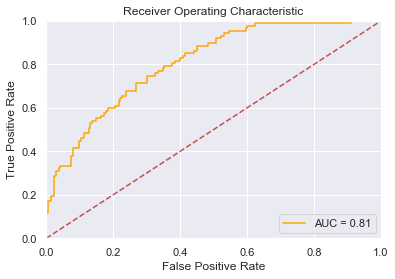

In [42]:
def plot_auc(labels, probs):
    ## Compute the false positive rate, true positive rate
    ## and threshold along with the AUC
    fpr, tpr, threshold = sklm.roc_curve(labels, probs[:,1])
    auc = sklm.auc(fpr, tpr)
    
    ## Plot the result
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
plot_auc(y_test, probabilities)

In [43]:
features.shape

(16404, 13)

In [44]:

from sklearn.ensemble import RandomForestClassifier

param_grid = {"max_features": [2, 5, 7, 10, 13], "min_samples_leaf":[2, 6, 10, 20]}
nr.seed(4564)
rf_clf = RandomForestClassifier(class_weight = "balanced")
nr.seed(6123)
rf_clf = ms.GridSearchCV(estimator = rf_clf, param_grid = param_grid, 
                      cv = inside, # Use the inside folds
                      scoring = 'roc_auc',
                      return_train_score = True)
rf_clf.fit(features, labels)
print(rf_clf.best_estimator_.max_features)
print(rf_clf.best_estimator_.min_samples_leaf)

C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


5
20


In [45]:
nr.seed(1432)
rf_mod = RandomForestClassifier(class_weight = "balanced", 
                                max_features = rf_clf.best_estimator_.max_features, 
                                min_samples_leaf = rf_clf.best_estimator_.min_samples_leaf) 
rf_mod.fit(X_train, y_train)
probabilities = rf_mod.predict_proba(X_test)
scores = score_model(probabilities, 0.54)
print_metrics(y_test, scores)

C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


                 Confusion matrix
                 Score positive    Score negative
Actual positive       169                44
Actual negative        28                59

Accuracy  0.76
 
           Positive      Negative
Num case      213            87
Precision    0.86          0.57
Recall       0.79          0.68
F1           0.82          0.62


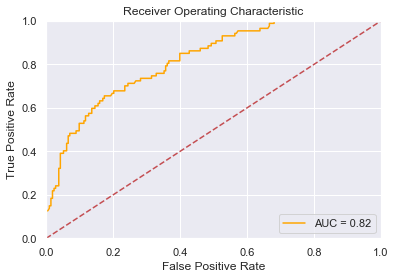

In [46]:
plot_auc(y_test, probabilities)

In [47]:
# importing test data
final_test = pd.read_csv('AW_test.csv')
print(final_test.shape)
print(final_test.CustomerID.unique().shape)

(500, 23)
(500,)


In [48]:
final_test.head()

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
0,18988,NaN,Courtney,A,Baker,NaN,8727 Buena Vista Ave.,NaN,Fremont,California,...,1/5/1945,Bachelors,Management,F,S,0,2,0,5,86931
1,29135,NaN,Adam,C,Allen,NaN,3491 Cook Street,NaN,Haney,British Columbia,...,10/4/1964,Bachelors,Skilled Manual,M,M,1,2,2,4,100125
2,12156,NaN,Bonnie,NaN,Raji,NaN,359 Pleasant Hill Rd,NaN,Burbank,California,...,1/12/1934,Graduate Degree,Management,F,M,1,2,0,4,103985
3,13749,NaN,Julio,C,Alonso,NaN,8945 Euclid Ave.,NaN,Burlingame,California,...,9/22/1958,Graduate Degree,Skilled Manual,M,M,1,0,0,4,127161
4,27780,NaN,Christy,A,Andersen,NaN,"42, boulevard Tremblay",NaN,Dunkerque,Nord,...,3/19/1965,High School,Manual,F,M,1,1,2,2,21876


In [49]:
final_test['hasChildAtHome'] = generate_has_child_at_home(final_test,[])

In [50]:
final_features = final_test[chosen_features]
final_features.head()

,YearlyIncome,NumberCarsOwned,Occupation,Gender,MaritalStatus,hasChildAtHome
0,86931,2,Management,F,S,N
1,100125,2,Skilled Manual,M,M,Y
2,103985,2,Management,F,M,N
3,127161,0,Skilled Manual,M,M,N
4,21876,1,Manual,F,M,Y


In [51]:
numeric_final_features = np.array(final_features[['YearlyIncome','NumberCarsOwned']])
encoded_final_features = encode_cat_features(final_features)
final_features = np.concatenate([encoded_final_features,numeric_final_features], 1)
final_features[3,:13]

C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\user\Anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can speci

array([0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
       0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
       0.00000e+00, 1.27161e+05, 0.00000e+00])

In [52]:
final_features[:,11:] = scaler.transform(final_features[:,11:])
final_features[:2]

array([[0.        , 1.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 1.        ,
        0.        , 0.2203181 , 0.43844103],
       [0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 1.        , 1.        , 0.        , 0.        ,
        1.        , 0.55239847, 0.43844103]])

In [53]:
probabilities = rf_mod.predict_proba(final_features)
scores = score_model(probabilities, 0.54)

In [54]:
print(scores)

[0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 0 1 1 1
 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 1 0
 0 1 1 1 0 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1
 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0
 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 1 0 1 0 1 1 1 0 1 0 0 1 1 1 0
 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 1
 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1
 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 1 1 0 1
 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 1 1 1 1 0 1 0 1 1 1 0 0 1 1 0 1 0 0 1 0 0 0
 1 0 0 1 0 1 0 0 0 1 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 0 1
 0 1 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 1 0 1 0 1
 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 1 0 0 0 0 1 1 1 1
 1 1 1 0 0 1 0 0 1 1 1 1 

In [55]:
np.savetxt('challenge2.csv', scores, delimiter=',',fmt='%i')